In [1]:
import pandas as pd
import numpy as np              
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
cardio =  pd.read_csv("cardio_train.csv")

In [3]:
cardio.head()

,age,gender,weight,ap_hi,ap_lo,smoke,alco,cardio
0,30,1,59.0,120,80,0,0,0
1,30,1,59.0,110,70,0,0,0
2,30,2,92.0,100,60,0,0,1
3,39,2,87.0,150,100,0,0,1
4,39,2,75.0,200,140,0,0,1


In [4]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33946 entries, 0 to 33945
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     33946 non-null  int64  
 1   gender  33946 non-null  int64  
 2   weight  33946 non-null  float64
 3   ap_hi   33946 non-null  int64  
 4   ap_lo   33946 non-null  int64  
 5   smoke   33946 non-null  int64  
 6   alco    33946 non-null  int64  
 7   cardio  33946 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.1 MB


In [5]:
cardio.describe()

,age,gender,weight,ap_hi,ap_lo,smoke,alco,cardio
count,33946.000000,33946.000000,33946.000000,33946.000000,33946.000000,33946.000000,33946.000000,33946.000000
mean,53.069522,1.430301,76.841889,130.013345,82.510635,0.151476,0.100071,0.479644
std,6.994697,0.495126,16.773313,20.277453,11.962418,0.358517,0.300099,0.499593
min,30.000000,1.000000,40.000000,60.000000,30.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,65.000000,120.000000,79.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,75.000000,130.000000,80.000000,0.000000,0.000000,0.000000
75%,59.000000,2.000000,87.000000,140.000000,90.000000,0.000000,0.000000,1.000000
max,65.000000,2.000000,200.000000,240.000000,190.000000,1.000000,1.000000,1.000000


In [6]:
cardio['smoke'].value_counts()

0    28804
1     5142
Name: smoke, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'cardio'}>, <AxesSubplot:>]],
      dtype=object)

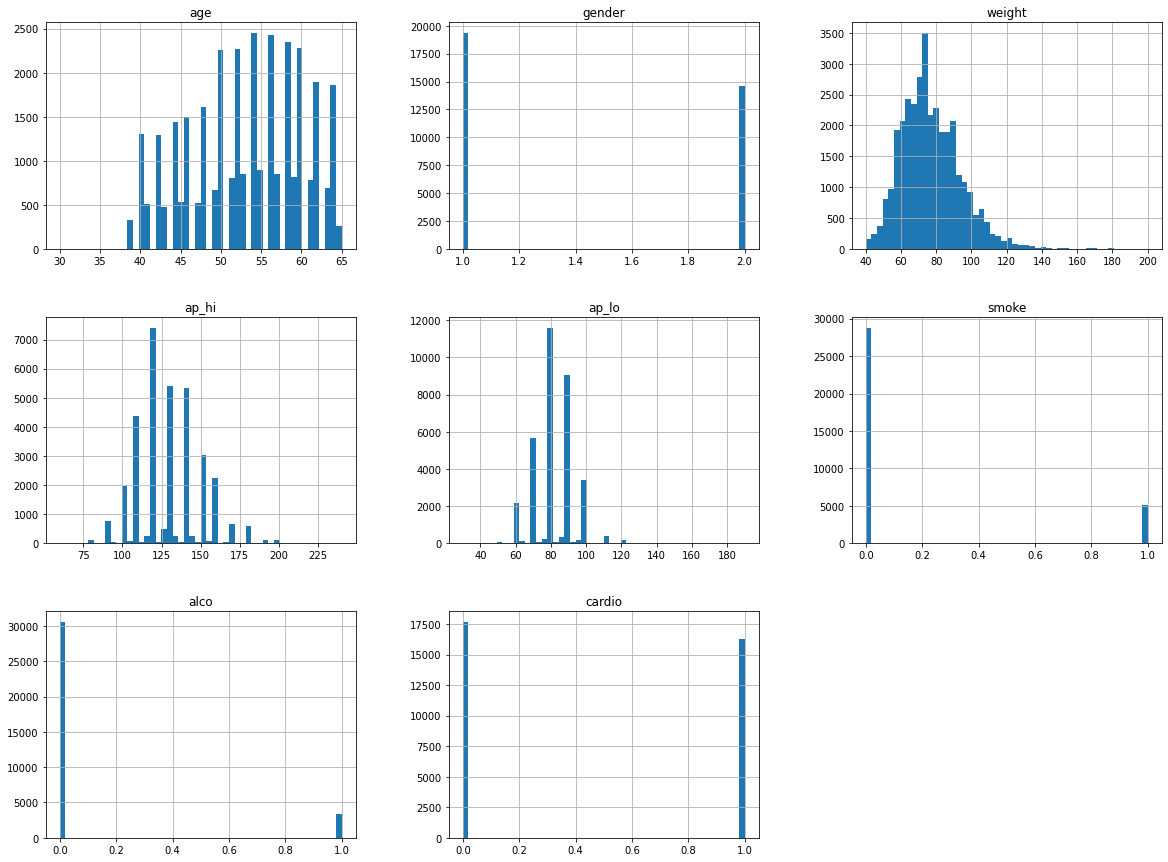

In [7]:
cardio.hist(bins=50,figsize=(20,15))

## Preprocessing

In [8]:
#REMOVE DUPLICATES
cardio.drop_duplicates(inplace=True)
print(format(cardio.duplicated().sum()))

0


In [9]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33844 entries, 0 to 33945
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     33844 non-null  int64  
 1   gender  33844 non-null  int64  
 2   weight  33844 non-null  float64
 3   ap_hi   33844 non-null  int64  
 4   ap_lo   33844 non-null  int64  
 5   smoke   33844 non-null  int64  
 6   alco    33844 non-null  int64  
 7   cardio  33844 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.3 MB


In [10]:

cardio.head()


,age,gender,weight,ap_hi,ap_lo,smoke,alco,cardio
0,30,1,59.0,120,80,0,0,0
1,30,1,59.0,110,70,0,0,0
2,30,2,92.0,100,60,0,0,1
3,39,2,87.0,150,100,0,0,1
4,39,2,75.0,200,140,0,0,1


## Looking For Correlations

In [11]:
corr_matrix = cardio.corr()
corr_matrix['cardio'].sort_values(ascending=False)

cardio    1.000000
ap_hi     0.560051
ap_lo     0.346950
age       0.134182
weight    0.107131
gender   -0.039714
alco     -0.045531
smoke    -0.065712
Name: cardio, dtype: float64

In [12]:
x = cardio.drop("cardio",axis=1)
y = cardio['cardio'].copy()
print(x.shape)
print(y.shape)

(33844, 7)
(33844,)


## Train Test Split

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f"length of train set : {len(X_train)}\nlength of test set : {len(X_test)}")

length of train set : 27075
length of test set : 6769


## Selecting A desired Model

In [14]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)

0.9125424730388536

In [15]:
count = 0
p = 0
s = 0
for i,j in zip(gnb.predict(x),y):
    if i == j:
        count+=1
    if i == 1 and j == 1:
        p+=1
    if i == 0 and j == 0:
        s+=1
print(count,p,s)

30840 14957 15883


In [16]:
rf= RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9270202393263407

In [17]:
count = 0
p = 0
s = 0
for i,j in zip(rf.predict(X_test),y_test):
    if i == j:
        count+=1
    if i == 1 and j == 1:
        p+=1
    if i == 0 and j == 0:
        s+=1

In [18]:
print(count,p,s)
count/len(y)

6275 3007 3268


0.1854095260607493

In [19]:
import xgboost as xgb
boost = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth =10, alpha = 3, n_estimators = 10)
boost.fit(X_train,y_train)
boost.score(X_test,y_test)

0.9496232826119072

In [20]:
count = 0
p = 0
s = 0
for i,j in zip(boost.predict(X_test),y_test):
    if i == j:
        count+=1
    if i == 1 and j == 1:
        p+=1
    if i == 0 and j == 0:
        s+=1
print(count,p,s)     

6428 3176 3252


In [21]:
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9284975624169006

c:\Users\akhil\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


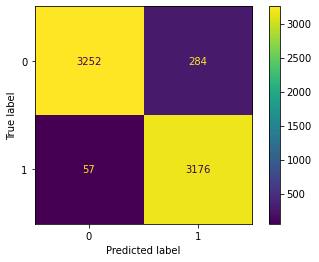

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boost,X_test,y_test)

## Testing Model

In [23]:
k = [np.array([30,1,65,160,75,1,1])]
# k = principal.transform(k)
df = pd.DataFrame(k,columns=["age","gender","weight","ap_hi","ap_lo","smoke","alco"])
print(df)
boost.predict(df)


   age  gender  weight  ap_hi  ap_lo  smoke  alco
0   30       1      65    160     75      1     1


array([1])

## Saving the Model

In [24]:
import pickle
pickle.dump(boost,open('model.pkl','wb'))


In [25]:
model = pickle.load(open('model.pkl','rb'))
x = [np.array([45,1,20,120,80,0,0])]
df = pd.DataFrame(x,columns=["age","gender","weight","ap_hi","ap_lo","smoke","alco"])
print(model.predict(df))

[0]


### The End